In [0]:
import pandas as pd
import numpy as np
import matplotlib as ml
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
ml.style.use('ggplot')

In [3]:
# Reading csv files in Google Colab.
# Step1 : Mount your Google Drive to colab
# Step2 : Provide the path to read_csv

from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
movie = pd.read_csv('/content/gdrive/My Drive/movie.csv')
movie.head(20)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [5]:
movie.drop('genres', axis = 1)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
27273,131254,Kein Bund für's Leben (2007)
27274,131256,"Feuer, Eis & Dosenbier (2002)"
27275,131258,The Pirates (2014)
27276,131260,Rentun Ruusu (2001)


In [6]:
movie.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [7]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
movieId    27278 non-null int64
title      27278 non-null object
genres     27278 non-null object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [8]:
rating = pd.read_csv('/content/gdrive/My Drive/rating.csv')
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [9]:
rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [0]:
rating.drop('timestamp', axis = 1, inplace = True)

**ATTEMPT TO SEPARATE OUT THE GENRES**

In [84]:
movie.genres.str.split('|').tolist()

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy'],
 ['Action', 'Crime', 'Thriller'],
 ['Comedy', 'Romance'],
 ['Adventure', 'Children'],
 ['Action'],
 ['Action', 'Adventure', 'Thriller'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy', 'Horror'],
 ['Adventure', 'Animation', 'Children'],
 ['Drama'],
 ['Action', 'Adventure', 'Romance'],
 ['Crime', 'Drama'],
 ['Drama', 'Romance'],
 ['Comedy'],
 ['Comedy'],
 ['Action', 'Comedy', 'Crime', 'Drama', 'Thriller'],
 ['Comedy', 'Crime', 'Thriller'],
 ['Crime', 'Drama', 'Horror', 'Mystery', 'Thriller'],
 ['Action', 'Crime', 'Thriller'],
 ['Drama', 'Sci-Fi'],
 ['Drama', 'Romance'],
 ['Drama'],
 ['Children', 'Drama'],
 ['Drama', 'Romance'],
 ['Adventure', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi'],
 ['Crime', 'Drama'],
 ['Drama'],
 ['Mystery', 'Sci-Fi', 'Thriller'],
 ['Adventure', 'Romance', 'IMAX'],
 ['Children', 'Drama'],
 ['Drama', '

In [85]:
new = pd.DataFrame(movie.genres.str.split('|').tolist())
new.drop([5,6,7,8,9],axis=1)

,0,1,2,3,4
0,Adventure,Animation,Children,Comedy,Fantasy
1,Adventure,Children,Fantasy,None,None
2,Comedy,Romance,None,None,None
3,Comedy,Drama,Romance,None,None
4,Comedy,None,None,None,None
...,...,...,...,...,...
27273,Comedy,None,None,None,None
27274,Comedy,None,None,None,None
27275,Adventure,None,None,None,None
27276,(no genres listed),None,None,None,None


In [86]:
# Creating new columns with each column containing the separated out genres in each string

movie['new_genre1'] = new[0]
movie['new_genre2'] = new[1]
movie['new_genre3'] = new[2]
movie['new_genre4'] = new[3]
movie['new_genre5'] = new[4]

movie.head(20)

,movieId,title,genres,new_genre1,new_genre2,new_genre3,new_genre4,new_genre5
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure,Animation,Children,Comedy,Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy,Adventure,Children,Fantasy,None,None
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy,Romance,None,None,None
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Comedy,Drama,Romance,None,None
4,5,Father of the Bride Part II (1995),Comedy,Comedy,None,None,None,None
5,6,Heat (1995),Action|Crime|Thriller,Action,Crime,Thriller,None,None
6,7,Sabrina (1995),Comedy|Romance,Comedy,Romance,None,None,None
7,8,Tom and Huck (1995),Adventure|Children,Adventure,Children,None,None,None
8,9,Sudden Death (1995),Action,Action,None,None,None,None
9,10,GoldenEye (1995),Action|Adventure|Thriller,Action,Adventure,Thriller,None,None


**PLOTTING FREQUENCIES OF RATINGS**

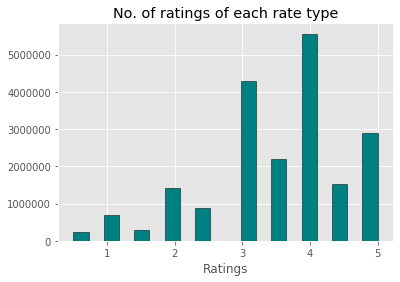

In [71]:
# Plot frequencies of ratings
plt.hist(rating['rating'], bins=20,color="teal",edgecolor="black")
plt.xlabel("Ratings")
plt.title("No. of ratings of each rate type")
plt.show()

**PLOTTING RATINGS PER MOVIE**

In [60]:
sample = rating[['movieId','rating']].groupby('movieId').count()
sample

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161
...,...
131254,1
131256,1
131258,1


In [55]:
sample.rating.values

array([49695, 22243, 12735, ...,     1,     1,     1])

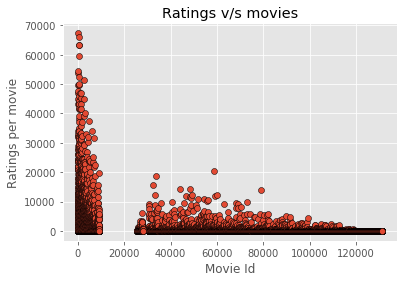

In [61]:
plt.scatter(sample.index,sample.rating.values,edgecolor='black')
plt.xlabel("Movie Id")
plt.ylabel("Ratings per movie")
plt.title("Ratings v/s movies")
plt.show()

**PLOTTING RATINGS PER USER**

In [68]:
sample1 = rating[['rating','userId']].groupby('userId').count()
sample1

,rating
userId,
1,175
2,61
3,187
4,28
5,66
...,...
138489,38
138490,151
138491,22


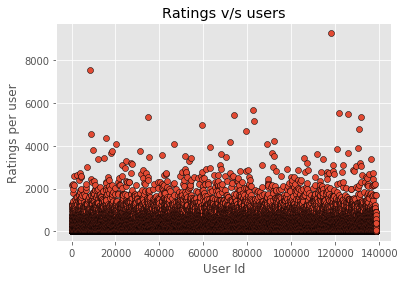

In [81]:
# Plot ratings per movie

# Scatter plot
plt.scatter(sample1.index,sample1.rating.values,edgecolors='black')
plt.xlabel("User Id")
plt.ylabel("Ratings per user")
plt.title("Ratings v/s users")
plt.show()

**CREATING A NEW DATASET THAT CONTAINS THE POPULAR MOVIES. POPULARITY MEASURED ON VOTES EARNED.**

In [15]:
# Get those users who are active.
# Measurement of activeness ? Have voted > 200 times

user = rating['userId'].value_counts() > 200
active = user[user].index.tolist()
active

[118205,
 8405,
 82418,
 121535,
 125794,
 74142,
 34576,
 131904,
 83090,
 59477,
 130767,
 79159,
 8963,
 15617,
 92011,
 71975,
 20132,
 46470,
 88820,
 63147,
 130459,
 120575,
 9544,
 31122,
 18611,
 125978,
 18138,
 91193,
 111549,
 68026,
 41267,
 51703,
 92269,
 70201,
 35128,
 105580,
 14705,
 54465,
 114406,
 136268,
 12131,
 53346,
 24688,
 107326,
 131347,
 26867,
 27469,
 119048,
 123606,
 67346,
 86529,
 22901,
 129583,
 131894,
 91867,
 7201,
 24219,
 62812,
 61168,
 68063,
 51558,
 97853,
 32344,
 80092,
 103223,
 107640,
 128258,
 79531,
 128309,
 92956,
 118754,
 76630,
 106441,
 59414,
 113668,
 122995,
 116189,
 50297,
 52260,
 72008,
 33736,
 52009,
 43194,
 117144,
 3907,
 137202,
 27053,
 31404,
 42929,
 119531,
 135425,
 66763,
 116317,
 64843,
 131961,
 2261,
 42204,
 903,
 69793,
 73611,
 49554,
 58953,
 95301,
 23173,
 4358,
 80920,
 16676,
 72983,
 4222,
 133811,
 55765,
 101044,
 34651,
 99754,
 52636,
 110758,
 134567,
 32514,
 75810,
 60159,
 57735,
 2139

In [16]:
# Extract only these indices

new_rating = rating[rating['userId'].isin(active)]
new_rating.head(20)

,userId,movieId,rating
541,7,3,3.0
542,7,7,3.0
543,7,11,4.0
544,7,15,2.0
545,7,16,3.0
546,7,17,2.0
547,7,24,3.0
548,7,105,2.0
549,7,122,2.0
550,7,151,3.0


In [17]:
# Merge the two datasets based on common/primary key, i.e, movieId

df = movie.merge(new_rating, on = 'movieId')
df

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,24,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,3.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,53,4.0
...,...,...,...,...,...
12426471,131254,Kein Bund für's Leben (2007),Comedy,79570,4.0
12426472,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,79570,4.0
12426473,131258,The Pirates (2014),Adventure,28906,2.5
12426474,131260,Rentun Ruusu (2001),(no genres listed),65409,3.0


In [18]:
# Get the most popular movies, i.e, the movies which have been voted > 60 times

m = df['movieId'].value_counts() > 60
popular = m[m].index.tolist()
popular

[356,
 296,
 2571,
 480,
 593,
 260,
 1270,
 1196,
 1198,
 1210,
 318,
 1580,
 589,
 1,
 2858,
 110,
 2762,
 780,
 1240,
 1265,
 1097,
 608,
 50,
 2028,
 1291,
 47,
 377,
 527,
 2959,
 1136,
 2716,
 32,
 457,
 1036,
 858,
 4993,
 1214,
 3578,
 1721,
 2628,
 592,
 4306,
 1527,
 541,
 648,
 150,
 1197,
 364,
 1704,
 1682,
 5952,
 1200,
 380,
 1089,
 367,
 3793,
 1923,
 588,
 4226,
 2997,
 590,
 500,
 1193,
 2115,
 1206,
 924,
 1387,
 597,
 1961,
 1258,
 2918,
 733,
 1617,
 7153,
 5349,
 3996,
 1213,
 919,
 2683,
 2291,
 344,
 4963,
 586,
 1517,
 2987,
 1073,
 6539,
 5445,
 2916,
 1222,
 736,
 1208,
 1221,
 2174,
 2706,
 1101,
 2011,
 34,
 1732,
 1784,
 1246,
 1393,
 1917,
 1968,
 231,
 2396,
 2797,
 1307,
 4886,
 293,
 1259,
 1610,
 595,
 6377,
 587,
 1573,
 1220,
 2012,
 778,
 4995,
 1584,
 3114,
 1079,
 3147,
 165,
 6874,
 4027,
 750,
 1080,
 223,
 539,
 912,
 2000,
 111,
 5418,
 2355,
 4022,
 39,
 1219,
 153,
 2791,
 2502,
 2329,
 357,
 1225,
 1653,
 316,
 1391,
 2,
 10,
 4973,
 2617,

In [19]:
# Extract only these indices

final = df[df['movieId'].isin(popular)]
final

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,24,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,3.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,53,4.0
...,...,...,...,...,...
12423934,120635,Taken 3 (2015),Action|Crime|Thriller,122058,2.0
12423935,120635,Taken 3 (2015),Action|Crime|Thriller,123352,2.0
12423936,120635,Taken 3 (2015),Action|Crime|Thriller,130477,2.5
12423937,120635,Taken 3 (2015),Action|Crime|Thriller,133047,5.0


In [20]:
# Now, one user may have voted more than once for the same movie with the same vote. Remove those duplicates.

final.drop_duplicates(subset=['userId','title'])
# Notice the change in shape.

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,24,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,3.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,53,4.0
...,...,...,...,...,...
12423934,120635,Taken 3 (2015),Action|Crime|Thriller,122058,2.0
12423935,120635,Taken 3 (2015),Action|Crime|Thriller,123352,2.0
12423936,120635,Taken 3 (2015),Action|Crime|Thriller,130477,2.5
12423937,120635,Taken 3 (2015),Action|Crime|Thriller,133047,5.0


In [21]:
# Get the ratings per movie per user.
# How ? Create a pivot table

pvt = final.pivot_table(index='title',columns='userId',values='rating')
pvt

userId,7,11,14,24,31,53,54,58,69,82,91,96,104,116,124,129,130,131,132,133,134,137,140,147,154,156,170,206,208,215,220,238,239,245,247,248,251,258,271,278,...,138283,138285,138289,138291,138295,138301,138305,138307,138308,138317,138325,138328,138330,138335,138343,138348,138382,138386,138387,138397,138404,138406,138411,138414,138419,138432,138436,138437,138449,138454,138456,138457,138459,138464,138467,138472,138474,138477,138483,138493
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
'night Mother (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(500) Days of Summer (2009),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loudQUIETloud: A Film About the Pixies (2006),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xXx (2002),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.5,NaN,...,NaN,4.0,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
xXx: State of the Union (2005),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# A model can't work on non-numerical data. So convert all NaN to -1.
pvt.fillna(-1,inplace=True)
pvt

userId,7,11,14,24,31,53,54,58,69,82,91,96,104,116,124,129,130,131,132,133,134,137,140,147,154,156,170,206,208,215,220,238,239,245,247,248,251,258,271,278,...,138283,138285,138289,138291,138295,138301,138305,138307,138308,138317,138325,138328,138330,138335,138343,138348,138382,138386,138387,138397,138404,138406,138411,138414,138419,138432,138436,138437,138449,138454,138456,138457,138459,138464,138467,138472,138474,138477,138483,138493
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
'Round Midnight (1986),-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
'Til There Was You (1997),-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
"'burbs, The (1989)",-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,...,-1.0,-1.0,-1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,3.0,-1.0,-1.0,-1.0,-1.0,4.0,-1.0,-1.0,-1.0
'night Mother (1986),-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
(500) Days of Summer (2009),-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,4.5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,-1.0,-1.0,3.5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.5,4.5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.5,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loudQUIETloud: A Film About the Pixies (2006),-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
xXx (2002),-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,2.5,-1.0,...,-1.0,4.0,-1.0,-1.0,0.5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
xXx: State of the Union (2005),-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.

**WORKING ON BUILDING THE MODEL'S REQUIREMENTS**

In [23]:
# But the model cannot work on a pivot table. So it is flattened out to a sparse matrix.

from scipy.sparse import csr_matrix
spm = csr_matrix(pvt)
spm

<9520x26599 sparse matrix of type '<class 'numpy.float64'>'
	with 253222480 stored elements in Compressed Sparse Row format>

In [24]:
# Creating, training and testing the model

from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(algorithm = 'brute')
nn.fit(spm)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [25]:
# Get the testing data
# Getting recommendations for one of the best movies : (500) Days Of Summer (2009)
# It is at index 4

pvt.index[4]

'(500) Days of Summer (2009)'

In [0]:
# The test data will be the entire row of index 4, reshaped to a 1 x 26599 array.
test = pvt.iloc[4,:].values.reshape(1,26599)

In [0]:
distance, suggested = nn.kneighbors(test,n_neighbors=5)

In [28]:
# distance returns a list of distances of each predicted point from test point
distance

array([[  0.        , 230.65179384, 234.3693666 , 234.60551997,
        235.43576619]])

In [29]:
# suggested will give us the indices of the recommended movies.
suggested

array([[   4,  114, 1969,  194, 8918]])

In [30]:
# Let's check
# (500) Days of Summer (2009) is a romantic movie.

pvt.index[1969]

'Crazy, Stupid, Love. (2011)'

In [0]:
# Crazy, Stupid, Love. (2011) is another excellent romantic/fantasy movie

In [32]:
pvt.index[114]

'50/50 (2011)'

In [33]:
pvt.index[194]

'Adventureland (2009)'

In [0]:
# Adventureland (2009) is a fiction/romance/fantasy movie

In [0]:
# Hence our model works

In [36]:
# Testing another test row.
# Test movie : 2012 (2009)

pvt.index[60]

'2012 (2009)'

In [0]:
test1 = pvt.iloc[60,:].values.reshape(1,26599)
dist, rec = nn.kneighbors(test1, n_neighbors=7)

In [38]:
dist

array([[  0.        , 144.20818285, 145.06550245, 146.20704497,
        146.34121087, 146.38135127, 146.61002694]])

In [39]:
rec

array([[  60, 7739,  791, 4936, 1222, 3258, 9242]])

In [40]:
# Let's check

pvt.index[4936]

'Legion (2010)'

In [0]:
# Both 2012 and Legion are doomsday based fantasy movies.